## Import libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [2]:
data = np.genfromtxt(
    "../data/raw/BankChurners.csv", 
    delimiter=',', 
    dtype=str, 
    encoding='utf-8',
    skip_header=1,
)

data = np.char.strip(data, '"')

columns = ['Client_Num', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 
           'Income_Category', 'Card_Category','Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
           'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
Client_Num = data[:,0].astype(np.float64)  
Attrition_Flag = data[:,1]
Customer_Age = data[:,2].astype(float)
Gender = data[:,3]
Dependent_count = data[:,4].astype(float)
Education_Level = data[:,5]
Marital_Status = data[:,6]
Income_Category = data[:,7]
Card_Category = data[:,8]
Total_Relationship_Count = data[:,10].astype(float)
Months_Inactive_12_mon = data[:,11].astype(float)
Contacts_Count_12_mon = data[:,12].astype(float)
Credit_Limit = data[:,13].astype(float)
Total_Revolving_Bal = data[:,14].astype(float)
Total_Trans_Amt = data[:,17].astype(float)
Total_Trans_Ct = data[:,18].astype(float)
Total_Ct_Chng_Q4_Q1 = data[:,19].astype(float)
Avg_Utilization_Ratio = data[:,20].astype(float)


## Explore data


### 1. Introduction

A business manager of a consumer credit card portfolio is facing the problem of customer attrition. They want to analyze the data to find out the reason behind this and leverage the same to predict customers who are likely to drop off.
In this dataset, I selected 18 columns to process, including:
- Client_Num
- Attrition_Flag
- Customer_Age
- Gender', 'Dependent_count
- Education_Level
- Marital_Status
- Income_Category
- Card_Category
- Total_Relationship_Count
- Months_Inactive_12_mon
- Contacts_Count_12_mon
- Credit_Limit
- Total_Revolving_Bal
- Total_Trans_Amt
- Total_Trans_Ct
- Total_Ct_Chng_Q4_Q1
- Avg_Utilization_Ratio

In [3]:
print("Sample data:\n")
customer = np.column_stack([Client_Num, Attrition_Flag, Customer_Age, Gender, Dependent_count,
                       Education_Level, Marital_Status, Income_Category, Card_Category,
                       Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon,
                       Credit_Limit, Total_Revolving_Bal, Total_Trans_Amt, Total_Trans_Ct,
                       Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio])
print(customer[:5])

Sample data:

[['768805383.0' 'Existing Customer' '45.0' 'M' '3.0' 'High School'
  'Married' '$60K - $80K' 'Blue' '5.0' '1.0' '3.0' '12691.0' '777.0'
  '1144.0' '42.0' '1.625' '0.061']
 ['818770008.0' 'Existing Customer' '49.0' 'F' '5.0' 'Graduate' 'Single'
  'Less than $40K' 'Blue' '6.0' '1.0' '2.0' '8256.0' '864.0' '1291.0'
  '33.0' '3.714' '0.105']
 ['713982108.0' 'Existing Customer' '51.0' 'M' '3.0' 'Graduate' 'Married'
  '$80K - $120K' 'Blue' '4.0' '1.0' '0.0' '3418.0' '0.0' '1887.0' '20.0'
  '2.333' '0.0']
 ['769911858.0' 'Existing Customer' '40.0' 'F' '4.0' 'High School'
  'Unknown' 'Less than $40K' 'Blue' '3.0' '4.0' '1.0' '3313.0' '2517.0'
  '1171.0' '20.0' '2.333' '0.76']
 ['709106358.0' 'Existing Customer' '40.0' 'M' '3.0' 'Uneducated'
  'Married' '$60K - $80K' 'Blue' '5.0' '1.0' '0.0' '4716.0' '0.0' '816.0'
  '28.0' '2.5' '0.0']]


### 2. Number of rows / columns

In [4]:
n_rows = len(Client_Num)
print(f"Number of rows     : {data.shape[0]}")
print(f"Number of selected columns : {customer.shape[1]}")
print(f"Original columns in CSV    : {data.shape[1]}")

Number of rows     : 10127
Number of selected columns : 18
Original columns in CSV    : 23


### 3. The meaning of each row

Each row represents information of ONE unique bank customer.

### 4. Checking duplicated customers

In [5]:
unique_count = len(np.unique(Client_Num))
print(f"Number of unique rows   : {unique_count}")
print(f"Number of duplicated rows : {n_rows - unique_count}")

Number of unique rows   : 10127
Number of duplicated rows : 0


### 5. The meaning of each column

- Attrition_Flag: Whether the customer churned (Target variable)
- Customer_Age: Age of the customer (in years)
- Gender: Gender (M = Male, F = Female)
- Dependent_count: Number of dependents
- Education_Level: Educational Qualification of the account holder (example: high school, college graduate, etc.)
- Marital_Status: Married, Single, Divorced, Unknown
- Income_Category: Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)
- Card_Category: Type of Card (Blue, Silver, Gold, Platinum)
- Total_Relationship_Count: Total number of bank products the customer uses
- Months_Inactive_12_mon: Number of inactive months in the last 12 months
- Contacts_Count_12_mon: Number of contacts with the bank in the last 12 months
- Credit_Limit: Credit Limit on the Credit Card
- Total_Revolving_Bal: Total Revolving Balance on the Credit Card
- Total_Trans_Amt: Total Transaction Amount (Last 12 months)
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
- Avg_Utilization_Ratio: Average Card Utilization Ratio

### 6. The current data type of each column and checking any columns having inappropriate data types

In [6]:
arr = [Client_Num, Attrition_Flag, Customer_Age, Gender, Dependent_count,
                       Education_Level, Marital_Status, Income_Category, Card_Category,
                       Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon,
                       Credit_Limit, Total_Revolving_Bal, Total_Trans_Amt, Total_Trans_Ct,
                       Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio]
for i, name in enumerate(columns, 1):
    print(f"{i:2}. {name:30}  Type: {arr[i-1].dtype}")
Income_Category[9]

 1. Client_Num                      Type: float64
 2. Attrition_Flag                  Type: <U19
 3. Customer_Age                    Type: float64
 4. Gender                          Type: <U19
 5. Dependent_count                 Type: float64
 6. Education_Level                 Type: <U19
 7. Marital_Status                  Type: <U19
 8. Income_Category                 Type: <U19
 9. Card_Category                   Type: <U19
10. Total_Relationship_Count        Type: float64
11. Months_Inactive_12_mon          Type: float64
12. Contacts_Count_12_mon           Type: float64
13. Credit_Limit                    Type: float64
14. Total_Revolving_Bal             Type: float64
15. Total_Trans_Amt                 Type: float64
16. Total_Trans_Ct                  Type: float64
17. Total_Ct_Chng_Q4_Q1             Type: float64
18. Avg_Utilization_Ratio           Type: float64


'$80K - $120K'

All columns have appropriate data types

### 7. The percentage of missing values

In [7]:
for i, name in enumerate(columns, 1):
    col = arr[i-1] 
    
    # Numeric
    if col.dtype == np.float64:
        missing_percent = 0.0
        note = "Numerical: no missing"
        
    # Categorical
    else:
        missing_count = np.sum((col == "") | (col == "Unknown"))
        missing_percent = missing_count / len(col) * 100
        note = f"{missing_count} 'Unknown'/empty"

    print(f"{i:2}. {name:30} {missing_percent:9.2f}%   ({note})")


 1. Client_Num                          0.00%   (Numerical: no missing)
 2. Attrition_Flag                      0.00%   (0 'Unknown'/empty)
 3. Customer_Age                        0.00%   (Numerical: no missing)
 4. Gender                              0.00%   (0 'Unknown'/empty)
 5. Dependent_count                     0.00%   (Numerical: no missing)
 6. Education_Level                    15.00%   (1519 'Unknown'/empty)
 7. Marital_Status                      7.40%   (749 'Unknown'/empty)
 8. Income_Category                    10.98%   (1112 'Unknown'/empty)
 9. Card_Category                       0.00%   (0 'Unknown'/empty)
10. Total_Relationship_Count            0.00%   (Numerical: no missing)
11. Months_Inactive_12_mon              0.00%   (Numerical: no missing)
12. Contacts_Count_12_mon               0.00%   (Numerical: no missing)
13. Credit_Limit                        0.00%   (Numerical: no missing)
14. Total_Revolving_Bal                 0.00%   (Numerical: no missing)
15. Tota

There are 3 columns having missing values

### 8. Numerical column: values distributed, min/max

In [34]:
print(f"{'Idx.':3} {'Column_Name':28} {'Min':>15} {'Max':>15} {'Mean':>15} {'Std':>15}")
print("-"*100)
numerical_indices = [2, 4, 9, 10, 11, 12, 13, 14, 15, 16, 17]  # index trong arr
# Corresponding column name
num_names = [columns[i] for i in numerical_indices]
for idx, name in zip(numerical_indices, num_names):
    col = arr[idx]                    
    print(f"{idx:3}. {name:28} "
          f"{col.min():15.2f} {col.max():15.2f} "
          f"{col.mean():15.2f} {col.std():15.2f}")

Idx. Column_Name                              Min             Max            Mean             Std
----------------------------------------------------------------------------------------------------
  2. Customer_Age                           26.00           73.00           46.33            8.02
  4. Dependent_count                         0.00            5.00            2.35            1.30
  9. Total_Relationship_Count                1.00            6.00            3.81            1.55
 10. Months_Inactive_12_mon                  0.00            6.00            2.34            1.01
 11. Contacts_Count_12_mon                   0.00            6.00            2.46            1.11
 12. Credit_Limit                         1438.30        34516.00         8631.95         9088.33
 13. Total_Revolving_Bal                     0.00         2517.00         1162.81          814.95
 14. Total_Trans_Amt                       510.00        18484.00         4404.09         3396.96
 15. Total_Trans_

### 9. Categorical columns: values distributed, number of different values 

In [35]:
cat_indices = [1, 3, 5, 6, 7, 8]  

cat_names = [columns[i] for i in cat_indices]

for idx, name in zip(cat_indices, cat_names):
    col = arr[idx]
    
    print(f"*Column {idx}: {name}")
    print("-" * 60)
    unique_vals, counts = np.unique(col, return_counts=True)
    n_unique = len(unique_vals)
    
    # Sort by descending
    sort_idx = np.argsort(-counts)
    unique_vals = unique_vals[sort_idx]
    counts = counts[sort_idx]
    
    
    for val, cnt in zip(unique_vals, counts):
        percentage = cnt / len(col) * 100
        print(f"   {val:25} | {cnt:5} khách ({percentage:5.2f}%)")
    
    print(f"~   Số giá trị khác nhau (unique values) : {n_unique}\n")

*Column 1: Attrition_Flag
------------------------------------------------------------
   Existing Customer         |  8500 khách (83.93%)
   Attrited Customer         |  1627 khách (16.07%)
~   Số giá trị khác nhau (unique values) : 2

*Column 3: Gender
------------------------------------------------------------
   F                         |  5358 khách (52.91%)
   M                         |  4769 khách (47.09%)
~   Số giá trị khác nhau (unique values) : 2

*Column 5: Education_Level
------------------------------------------------------------
   Graduate                  |  3128 khách (30.89%)
   High School               |  2013 khách (19.88%)
   Unknown                   |  1519 khách (15.00%)
   Uneducated                |  1487 khách (14.68%)
   College                   |  1013 khách (10.00%)
   Post-Graduate             |   516 khách ( 5.10%)
   Doctorate                 |   451 khách ( 4.45%)
~   Số giá trị khác nhau (unique values) : 7

*Column 6: Marital_Status
----------

### 10. Correlation between numeric columns

Strong correlations (|corr| > 0.5):
Total_Revolving_Bal            vs Avg_Utilization_Ratio         : 0.624
Total_Trans_Amt                vs Total_Trans_Ct                : 0.807



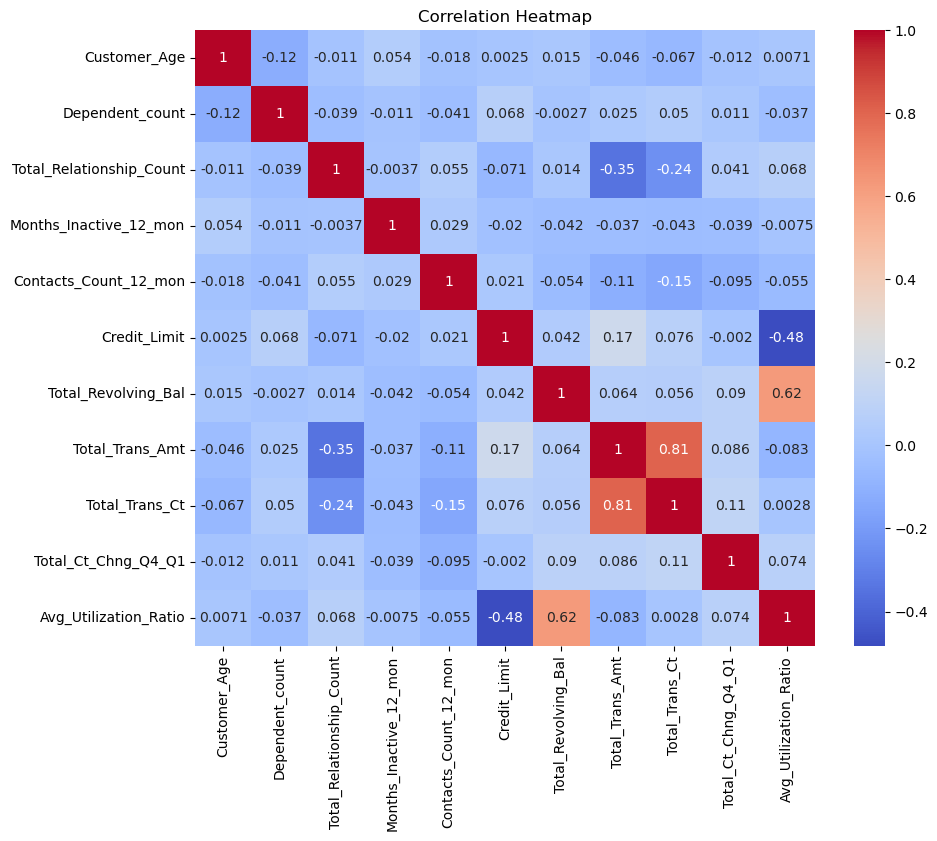

In [37]:
num_matrix = np.column_stack([arr[idx] for idx in numerical_indices])  # Skip Client_Num for corr
corr = np.corrcoef(num_matrix.T)
print("Strong correlations (|corr| > 0.5):")
pairs = np.where(np.abs(corr) > 0.5)
for i, j in zip(*pairs):
    if i < j:
        print(f"{columns[numerical_indices[i]]:30} vs {columns[numerical_indices[j]]:30}: {corr[i,j]:.3f}")
print()

#Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', xticklabels=num_names, yticklabels=num_names)
plt.title('Correlation Heatmap')
plt.show()

### 11. Compare distributions by Attrition Flag

In [41]:
print(f"{'Column':30} {'Existing Mean':>15} {'Attrited Mean':>15} {'Difference'}")
print("-"*90)
churn = (Attrition_Flag == "Attrited Customer").astype(int) # 0: Existing, 1: Attrited
for idx in numerical_indices:
    name = columns[idx]
    existing_mean = arr[idx][~churn].mean()
    attrited_mean = arr[idx][churn].mean()
    diff = attrited_mean - existing_mean
    print(f"{name:30} {existing_mean:15.2f} {attrited_mean:15.2f} {diff:12.2f}")

print('='*60)

# Thêm t-test cho Credit_Limit (H0: means equal, H1: differ)
attrited_cl = Credit_Limit[churn == 1]
existing_cl = Credit_Limit[churn == 0]
t_stat, p_val = stats.ttest_ind(attrited_cl, existing_cl, equal_var=False)
print(f"T-test Credit_Limit: t={t_stat:.2f}, p={p_val:.4f}")
print("H0: Means equal; H1: Means differ (p<0.05 -> reject H0)")

Column                           Existing Mean   Attrited Mean Difference
------------------------------------------------------------------------------------------
Customer_Age                             40.91           45.64         4.73
Dependent_count                           2.00            3.32         1.32
Total_Relationship_Count                  5.68            5.16        -0.52
Months_Inactive_12_mon                    2.16            1.00        -1.16
Contacts_Count_12_mon                     3.84            2.84        -1.00
Credit_Limit                           9567.51        11978.47      2410.96
Total_Revolving_Bal                    1645.95          790.98      -854.97
Total_Trans_Amt                        9988.91         1167.62     -8821.29
Total_Trans_Ct                           61.16           40.55       -20.61
Total_Ct_Chng_Q4_Q1                       0.66            1.96         1.30
Avg_Utilization_Ratio                     0.16            0.07        -0.09

NameError: name 'stats' is not defined

### 12. Outlier detection (IQR)

In [43]:
print(f"{'Column':30} {'Outliers':>10} {'Percentage':>10}")
print("-"*70)
for idx in numerical_indices:
    name = columns[idx]
    col = arr[idx]
    q1 = np.percentile(col, 25)
    q3 = np.percentile(col, 75)
    iqr = q3 - q1
    outliers = np.sum((col < q1 - 1.5*iqr) | (col > q3 + 1.5*iqr))
    pct = outliers / n_rows * 100
    print(f"{name:30} {outliers:10,} {pct:10.2f}%")
    


Column                           Outliers Percentage
----------------------------------------------------------------------
Customer_Age                            2       0.02%
Dependent_count                         0       0.00%
Total_Relationship_Count                0       0.00%
Months_Inactive_12_mon                331       3.27%
Contacts_Count_12_mon                 629       6.21%
Credit_Limit                          984       9.72%
Total_Revolving_Bal                     0       0.00%
Total_Trans_Amt                       896       8.85%
Total_Trans_Ct                          2       0.02%
Total_Ct_Chng_Q4_Q1                   394       3.89%
Avg_Utilization_Ratio                   0       0.00%


### 13. Visualizations other

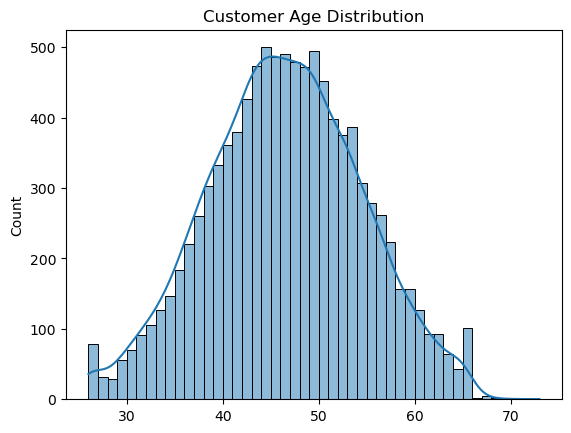

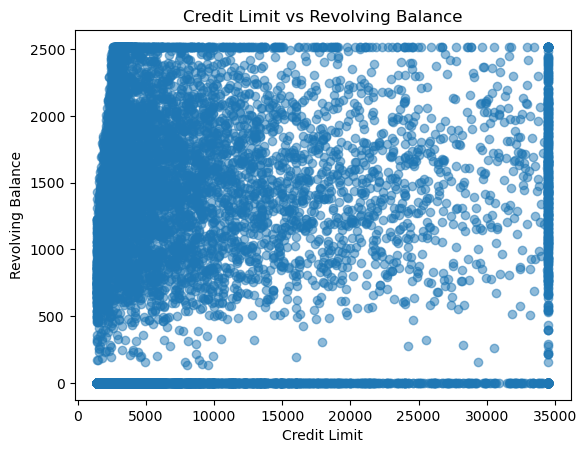

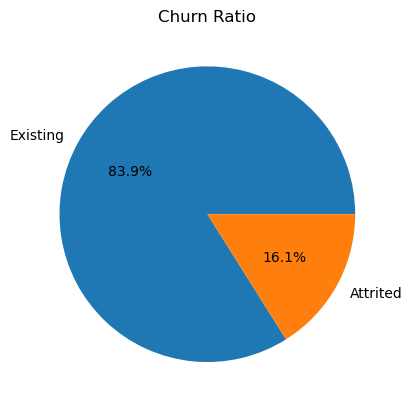

In [44]:

# Histogram Age
plt.figure()
sns.histplot(Customer_Age, kde=True)
plt.title('Customer Age Distribution')
plt.show()

# Scatter Credit vs Revolving
plt.figure()
plt.scatter(Credit_Limit, Total_Revolving_Bal, alpha=0.5)
plt.xlabel('Credit Limit')
plt.ylabel('Revolving Balance')
plt.title('Credit Limit vs Revolving Balance')
plt.show()

# Pie Churn
counts = np.bincount(churn)
plt.figure()
plt.pie(counts, labels=['Existing', 'Attrited'], autopct='%1.1f%%')
plt.title('Churn Ratio')
plt.show()